In [ ]:
!pip install tensorflow

In [ ]:
#An Example of Simple ANN
#importing the libs that we'll need today for deep learning
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv('bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
'''

Age: The age of the customer.
Job: The occupation of the customer.
Marital Status: The marital status of the customer.
Education: The education level of the customer.
Default: Whether or not the customer has credit in default.
Balance: The balance of the customer's account.
Housing Loan: Whether or not the customer has a housing loan.
Contact Communication Type: The method used to contact the customer (e.g., telephone, cellular).
Day: The day of the month when the last contact with the customers was made.
Duration: The duration (in seconds) of the last contact with customers during a campaign.
Campaign Contacts Count: Number of contacts performed during this campaign for each customer
-pdays : number days passed since previously contacted form previous camapign
-poutcome : outcome from previous marketing campaign



'''

"\n\nAge: The age of the customer.\nJob: The occupation of the customer.\nMarital Status: The marital status of the customer.\nEducation: The education level of the customer.\nDefault: Whether or not the customer has credit in default.\nBalance: The balance of the customer's account.\nHousing Loan: Whether or not the customer has a housing loan.\nContact Communication Type: The method used to contact the customer (e.g., telephone, cellular).\nDay: The day of the month when the last contact with the customers was made.\nDuration: The duration (in seconds) of the last contact with customers during a campaign.\nCampaign Contacts Count: Number of contacts performed during this campaign for each customer\n-pdays : number days passed since previously contacted form previous camapign\n-poutcome : outcome from previous marketing campaign\n\n\n\n"

In [ ]:
df.drop('duration', axis = 1,inplace=True)

In [ ]:
df['deposit'].value_counts()

,count
deposit,
no,5873
yes,5289


In [ ]:
#Encoded the targer variables!
df['deposit'] =  df['deposit'].map({'yes':1,'no':0})

In [ ]:
#input and out, x y

x = df.drop('deposit',axis = 1)
y = df['deposit']

In [ ]:
#Encoding the categorical

categorical_cols = x.select_dtypes(include=['object']).columns

In [ ]:
x = pd.get_dummies(x, columns=categorical_cols , drop_first = True)

In [ ]:
#Feature scaling

scaler  = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=5)

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu',input_dim = x_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Compiling the model

model.compile(loss = "binary_crossentropy", optimizer='SGD',metrics=['accuracy'])

In [ ]:
'''

Compiling the model --> setting the strategy for learning
1) loss function --> This gives an idea abput the error in the model
2) optimizer --> this controls, how the weights will be updated during
backpropagation
3) metric ---> what should be reported during the training phase


'''

'\n\nCompiling the model --> setting the strategy for learning\n1) loss function --> This gives an idea abput the error in the model\n2) optimizer --> this controls, how the weights will be updated during \nbackpropagation\n3) metric ---> what should be reported during the training phase\n\n\n'

In [ ]:
#Training the model
history = model.fit(x_train,y_train,validation_split=0.1,epochs = 150,batch_size=32,verbose=1)

Epoch 1/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8047 - loss: 0.4137 - val_accuracy: 0.6865 - val_loss: 0.7256
Epoch 2/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8072 - loss: 0.4101 - val_accuracy: 0.6898 - val_loss: 0.7095
Epoch 3/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8096 - loss: 0.4122 - val_accuracy: 0.6943 - val_loss: 0.7143
Epoch 4/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8114 - loss: 0.4099 - val_accuracy: 0.6842 - val_loss: 0.7295
Epoch 5/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8106 - loss: 0.4113 - val_accuracy: 0.6898 - val_loss: 0.7331
Epoch 6/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8039 - loss: 0.4205 - val_accuracy: 0.6876 - val_loss: 0.7162
Epoch 7/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8124 - loss: 0.4137 - val_accuracy: 0.6876 - val_loss: 0.7196
Epoch 8/150
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8139 - loss: 0.4105 - val_accu

In [ ]:
#Plots

import matplotlib.pyplot as plt
import seaborn as sns

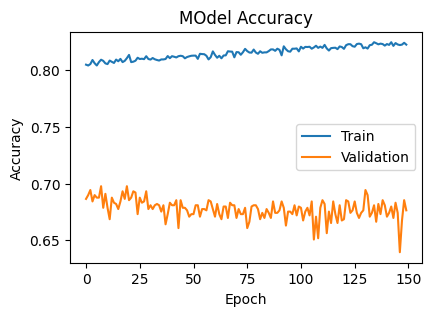

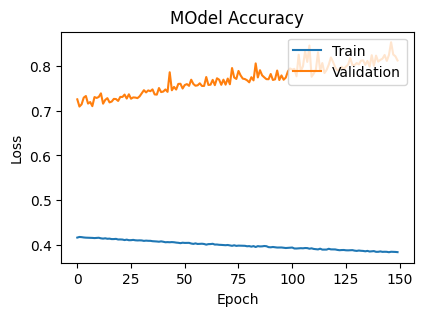

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MOdel Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])




plt.figure(figsize=(10,3))
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MOdel Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc = 'upper right')
plt.show()

